## Beach Timing Notebook

Eighth figure request for Stephanie

In [4]:
from cmocean import cm
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as mplcm
import numpy as np
import xarray as xr

%matplotlib inline

In [5]:
landcolour = 'papayawhip'
plt.rcParams['font.size'] = 15

In [36]:
minoil = 25 # litres per grid cell

In [7]:
#mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')
mesh = xr.open_dataset('~/Documents/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [39]:
#data3d_7 = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/Lagrangian_diesel-4_northern_strait_first30-4.nc')
data3d_7 = xr.open_dataset('/home/sallen/Documents/MIDOSS/Visualization/Lagrangian_diesel-4_northern_strait_first30-4.nc')

In [5]:
data3d_7

<xarray.Dataset>
Dimensions:                  (grid_x: 396, grid_x_latlon: 397, grid_y: 896, grid_y_latlon: 897, grid_z: 40, time: 168)
Coordinates:
  * time                     (time) datetime64[ns] 2018-09-03T00:30:00 ... 20...
  * grid_y                   (grid_y) int16 0 1 2 3 4 5 ... 891 892 893 894 895
  * grid_x                   (grid_x) int16 0 1 2 3 4 5 ... 391 392 393 394 395
  * grid_z                   (grid_z) int16 0 1 2 3 4 5 6 ... 34 35 36 37 38 39
  * grid_y_latlon            (grid_y_latlon) float32 0.0 1.0 2.0 ... 895.0 896.0
  * grid_x_latlon            (grid_x_latlon) float32 0.0 1.0 2.0 ... 395.0 396.0
Data variables:
    OilConcentration_2D      (time, grid_y, grid_x) float64 ...
    Thickness_2D             (time, grid_y, grid_x) float64 ...
    Dissolution_3D           (time, grid_z, grid_y, grid_x) float64 ...
    OilConcentration_3D      (time, grid_z, grid_y, grid_x) float64 ...
    OilWaterColumnOilVol_3D  (time, grid_z, grid_y, grid_x) float64 ...
    Latitude                 (grid_y_latlon, grid_x_latlon) float64 ...
    Longitude                (grid_y_latlon, grid_x_latlon) float64 ...
    Beaching_Time            (grid_y, grid_x) datetime64[ns] ...
    Beaching_Volume          (grid_y, grid_x) float64 ...
    Oil_Arrival_Time         (grid_y, grid_x) datetime64[ns] ...
Attributes:
    nco_openmp_thread_number:   1
    history:                    Sat Jun 12 00:04:14 2021: ncks -4 -L4 -A /loc...
    NCO:                        4.6.6
    history_of_appended_files:  Sat Jun 12 00:04:14 2021: Appended file /loca...

In [40]:
beachtime = (np.array(data3d_7.Beaching_Time - data3d_7.Beaching_Time.min())
              ) /  np.timedelta64(1, 's') /3600./24.

In [41]:
beached = np.ma.masked_array(beachtime, data3d_7.Beaching_Volume < minoil/1000)


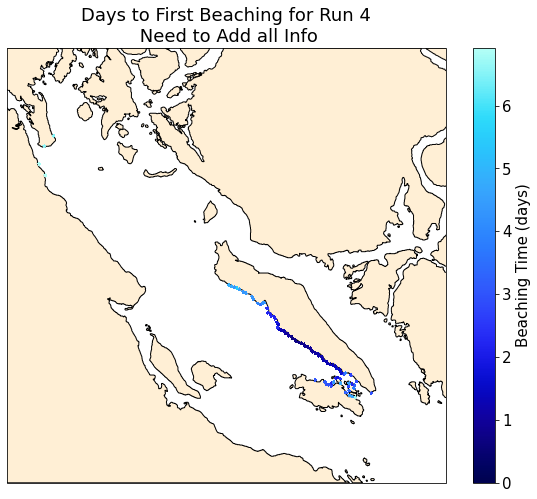

In [13]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
C = ax.pcolormesh(
    mesh.nav_lon[1:-1, 1:-1], mesh.nav_lat[1:-1, 1:-1], beached,
     transform=crs.PlateCarree(), zorder=2, cmap='cet_linear_blue_5_95_c73', vmin=0,
)
cb = fig.colorbar(C, ax=ax);
cb.set_label('Beaching Time (days)')
ax.set_title("Days to First Beaching for Run 4\n Need to Add all Info");
fig.savefig('BeachingTime_latlon.png');

Try with Scatter Instead

In [14]:
imin = 500
jmin = 100
imax = 770
jmax = 340

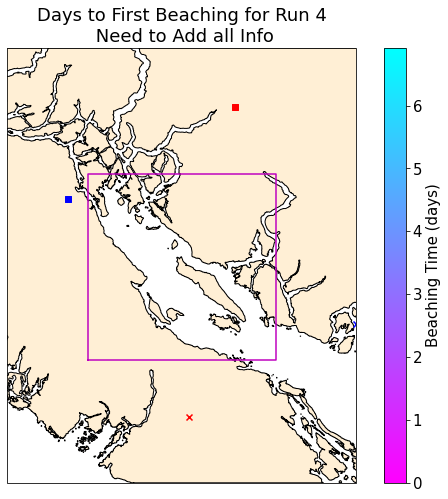

In [74]:
os = 0.6
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3-os, -123.9+os], [49.3-os, 50.2+os]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
#C = ax.pcolormesh(mesh.nav_lon[1:-1, 1:-1], mesh.nav_lat[1:-1, 1:-1], beached, transform=crs.PlateCarree(), zorder=2, cmap='cool_r', vmin=0,)
ax.scatter(mesh.nav_lon[imin, jmin], mesh.nav_lat[imin, jmin], color='r', marker='x', transform=crs.PlateCarree(), zorder=2)
ax.scatter(mesh.nav_lon[imax, jmax], mesh.nav_lat[imax, jmax], color='r', marker='s', transform=crs.PlateCarree(), zorder=2)
ax.scatter(mesh.nav_lon[imin, jmax], mesh.nav_lat[imin, jmax], color='b', marker='x', transform=crs.PlateCarree(), zorder=2)
ax.scatter(mesh.nav_lon[imax, jmin], mesh.nav_lat[imax, jmin], color='b', marker='s', transform=crs.PlateCarree(), zorder=2)
ax.plot([xlim[0]+os, xlim[1]-os, xlim[1]-os, xlim[0]+os, xlim[0]+os], 
        [ylim[0]+os, ylim[0]+os, ylim[1]-os, ylim[1]-os, ylim[0]+os], 'm-', transform=crs.PlateCarree(), zorder=2)

cb = fig.colorbar(C, ax=ax);
cb.set_label('Beaching Time (days)')
ax.set_title("Days to First Beaching for Run 4\n Need to Add all Info");
fig.savefig('BeachingTime_scatter_latlon.png');

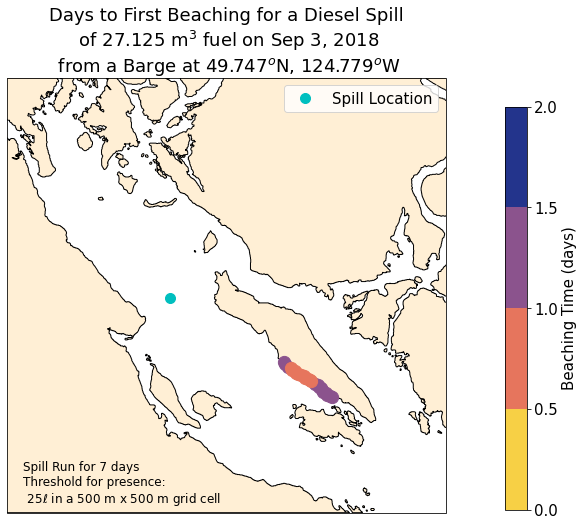

In [43]:
colormap2 = thermal_r_t
colormap = 'cmo.thermal_r'
dlat = mesh.nav_lat[imax, jmax] - mesh.nav_lat[imax-1, jmax-1]
dlon = mesh.nav_lon[imax, jmax] - mesh.nav_lon[imax-1, jmax-1]
bounds = np.arange(0, 2.5, 0.5)
normalize = colors.BoundaryNorm(bounds, thermal_r_t.N)
#normalize = colors.Normalize(vmin=0, vmax=2)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))

ax.plot(-124.779, 49.747, 'co', zorder=3, markersize=10, transform=crs.PlateCarree(), label="Spill Location")
ax.legend(loc='upper right')


for bt in range(6, -1, -1):
    for ii in range(imin, imax):
        for jj in range(jmin, jmax):
            if (beached[ii, jj] > bt) and (beached[ii, jj] < bt+1):
                ax.scatter(mesh.nav_lon[ii, jj] + dlon/2, mesh.nav_lat[ii, jj] + dlat/2, 
                           c=[beached[ii, jj]], marker='o', s=150, transform=crs.PlateCarree(), 
                           zorder=2, cmap=colormap2, norm=normalize)
#cb = fig.colorbar(C, ax=ax);
cax = fig.add_axes([0.9, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=colormap2, norm=normalize)
cb.set_label('Beaching Time (days)')
ax.set_title("Days to First Beaching for a Diesel Spill\n of 27.125 m$^3$ fuel on Sep 3, 2018\n from a Barge at 49.747$^o$N, 124.779$^o$W");
ax.text(-125.25, 49.32, f'Spill Run for 7 days\nThreshold for presence:\n {minoil}$\ell$ in a 500 m x 500 m grid cell',
       transform=crs.PlateCarree(), fontsize=12)
fig.savefig(f'BeachingTime_scatter_latlon_{minoil}.png', dpi=200);

In [16]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=-1):
    if n == -1:
        n = cmap.N
    new_cmap = colors.LinearSegmentedColormap.from_list(
         'trunc({name},{a:.2f},{b:.2f})'.format(name=cmap.name, a=minval, b=maxval),
         cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [17]:
minColor = 0.1
maxColor = 0.85
thermal_r_t = truncate_colormap(cm.thermal_r, minColor, maxColor)



In [28]:
data3d_7 = xr.open_dataset('/home/sallen/Documents/MIDOSS/Visualization/Lagrangian_diesel-2_northern_strait_first30-2.nc')

In [29]:
beachtime = (np.array(data3d_7.Beaching_Time - data3d_7.Beaching_Time.min())
              ) /  np.timedelta64(1, 's') /3600./24.

In [37]:
beached = np.ma.masked_array(beachtime, data3d_7.Beaching_Volume < minoil/1000)


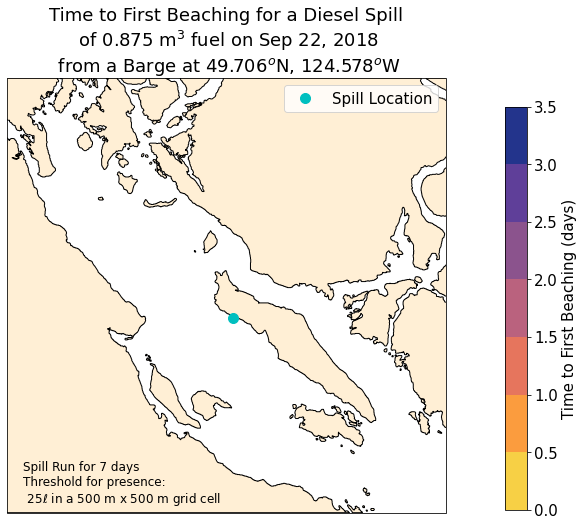

In [38]:
colormap2 = thermal_r_t
colormap = 'cmo.thermal_r'
dlat = mesh.nav_lat[imax, jmax] - mesh.nav_lat[imax-1, jmax-1]
dlon = mesh.nav_lon[imax, jmax] - mesh.nav_lon[imax-1, jmax-1]
bounds = np.arange(0, 4, 0.5)
normalize = colors.BoundaryNorm(bounds, thermal_r_t.N)
#normalize = colors.Normalize(vmin=0, vmax=2)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))

ax.plot(-124.578, 49.706, 'co', zorder=3, markersize=10, transform=crs.PlateCarree(), label="Spill Location")
ax.legend(loc='upper right')

for bt in range(6, -1, -1):
    for ii in range(imin, imax):
        for jj in range(jmin, jmax):
            if (beached[ii, jj] > bt) and (beached[ii, jj] < bt+1):
                ax.scatter(mesh.nav_lon[ii, jj] + dlon/2, mesh.nav_lat[ii, jj] + dlat/2, 
                           c=[beached[ii, jj]], marker='o', s=150, transform=crs.PlateCarree(), 
                           zorder=2, cmap=colormap2, norm=normalize)
#cb = fig.colorbar(C, ax=ax);
cax = fig.add_axes([0.9, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=colormap2, norm=normalize)
cb.set_label('Time to First Beaching (days)')
ax.set_title("Time to First Beaching for a Diesel Spill\n of 0.875 m$^3$ fuel on Sep 22, 2018\n from a Barge at 49.706$^o$N, 124.578$^o$W");
ax.text(-125.25, 49.32, f'Spill Run for 7 days\nThreshold for presence:\n {minoil}$\ell$ in a 500 m x 500 m grid cell',
       transform=crs.PlateCarree(), fontsize=12)
fig.savefig(f'BeachingTime_scatter_spill4_latlon_{minoil}.png', dpi=200);